<div style="text-align: center;">
    <img src="logo3.jpg" alt="Descripción de la imagen" width="200" style="border-radius: 15px;"/>
</div>

# BinarySort: Algoritmo de Ordenamiento Binario
<small>(solo nuneros enteros y positivos)</small>
<p>Cuaderno de pruebas y conclusiones</p>


<p>En el ámbito de la informática y las ciencias de la computación, la eficiencia algorítmica es un aspecto crucial que determina el rendimiento de sistemas y aplicaciones. Los algoritmos de ordenación tradicionales, como Quicksort y Mergesort, han establecido un estándar en la industria, con eficiencias promedio de O(n log n). Sin embargo, con el crecimiento de los volúmenes de datos y la creciente demanda de procesamiento en tiempo real, surge la necesidad de explorar nuevos paradigmas que puedan reducir aún más la complejidad temporal de los algoritmos de ordenación.Este estudio está motivado por la posibilidad de desarrollar un algoritmo de ordenación que logre una eficiencia aún mayor. Se ha planteado un enfoque binario(divide y venceras) para tratar de desarrollar un algoritmo  O(n log n) mas eficiente o conseguir un O(n).</p>

## Importamos las bibliotecas

In [243]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

## Cargamos la data ya ordenada

In [244]:
filename = 'data_final.csv'
df = pd.read_csv(filename)
df.head()
#df["ratio"] = ((df["size"]) / df["time"])


### Verificamos que todas las pruebas hayan sido exitosas

In [247]:
count_true = df['ordered'].value_counts()[True]
if count_true == df.shape[0]:
    print("todos se ordenaron")
else:
    print("no se ordenaron todos")

todos se ordenaron


### Cargamos constantes necesarias y funciones

In [248]:
def format_number(x, pos):
    if x >= 1e6:
        return f'{x/1e6:.1f}M' 
    elif x >= 1e3:
        return f'{x/1e3:.0f}k'  
    else:
        return str(int(x)) 
colors = ['#1f77b4', 'green', '#ff7f0e']
color_map = {
    'binarySort': '#1f77b4',
    'mergeSort': 'green',
    'quickSort': '#ff7f0e',
}
distributions = ['uniform', 'normal', 'bimodal', 'zeros', 'right_skewed', 'left_skewed']
def plot_distributions(df, dist, axisY = 'time'):
    ranges = [10000,20000,30000,40000,50000]
    fig, axs = plt.subplots(1, 5, figsize=(20, 4))  
    axs = axs.flatten()
    
    ax_index = 0

    for r in ranges:
        filtered_df = df[(df['range'] == r) & (df['distribution'] == dist)]
        
        ax = axs[ax_index]
        
        for method in filtered_df['method'].unique():
            subset = filtered_df[filtered_df['method'] == method]
            ax.plot(subset['size'], subset[axisY], label=method, color=color_map.get(method, 'black'), linewidth=2)

        ax.set_xlabel('Tamaño de la Lista')
        if axisY == 'time':
            ax.set_ylabel('Tiempo en segundos')
            ax.set_title(f'Rango de valores: entre 0 y {r}')
        if axisY == 'ratio':
            ax.set_ylabel('Ratio (Tamaño/Segundos)')
            ax.set_title(f'Rendimiento para un rango entre 0 y {r}')

        
        ax.legend(title='Algoritmo')
        ax.grid(True)
        
        ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_number))
        plt.xticks(rotation=45)

        ax_index += 1

    plt.tight_layout()
    plt.show()


# Grafica de lineas

<h3 style="font-size: 1.5em; font-weight: bold;">1. Distribucion Normal</h3>
<div style="display: flex; align-items: center;">
    <img src="normal.jpg" alt="Descripción de la imagen" width="200" style="border-radius: 15px; margin-right: 20px;"/>
    
</div>

<p>
    La <strong>distribución normal</strong>, también conocida como distribución de Gauss o campana de Gauss, es una de las distribuciones de probabilidad más importantes en estadística. Es una distribución continua que describe cómo los valores de una variable aleatoria se distribuyen en torno a una media (μ) con una desviación estándar (σ). La forma de la distribución es simétrica, con una curva en forma de campana, donde la mayoría de los valores se agrupan alrededor de la media, y la probabilidad de observar valores extremos disminuye a medida que se alejan de la media.
</p>
<p>
    Las características clave de la distribución normal son:
</p>
<ul>
    <li><strong>Media (μ):</strong> El punto central de la distribución.</li>
    <li><strong>Desviación estándar (σ):</strong> Una medida de la dispersión de los valores alrededor de la media.</li>
    <li><strong>Simetría:</strong> La distribución es perfectamente simétrica alrededor de la media.</li>
    <li><strong>Curva de campana:</strong> La curva es más alta en la media y disminuye gradualmente en ambos lados.</li>
</ul>

<h3>Ejemplos de Distribución Normal</h3>
<ol>
    <li>
        <strong>Altura de las Personas:</strong><br>
        La altura de los adultos en una población tiende a seguir una distribución normal. Por ejemplo, la altura media de los hombres en un país podría ser de 175 cm, con una desviación estándar de 7 cm. Esto significa que la mayoría de los hombres tienen una altura cercana a 175 cm, y es menos probable encontrar hombres extremadamente altos o bajos.
    </li>
    <li>
        <strong>Errores de Medición:</strong><br>
        Los errores en mediciones experimentales suelen seguir una distribución normal. Por ejemplo, si un científico repite varias veces una medición de temperatura y la media es 100°C con una desviación estándar de 0.5°C, las mediciones se agruparán alrededor de 100°C, y las mediciones que se alejan significativamente de este valor serán menos comunes.
    </li>
</ol>


#### Análisis del Tiempo de Ejecución de Algoritmos de Ordenamiento Según el Tamaño de la Lista

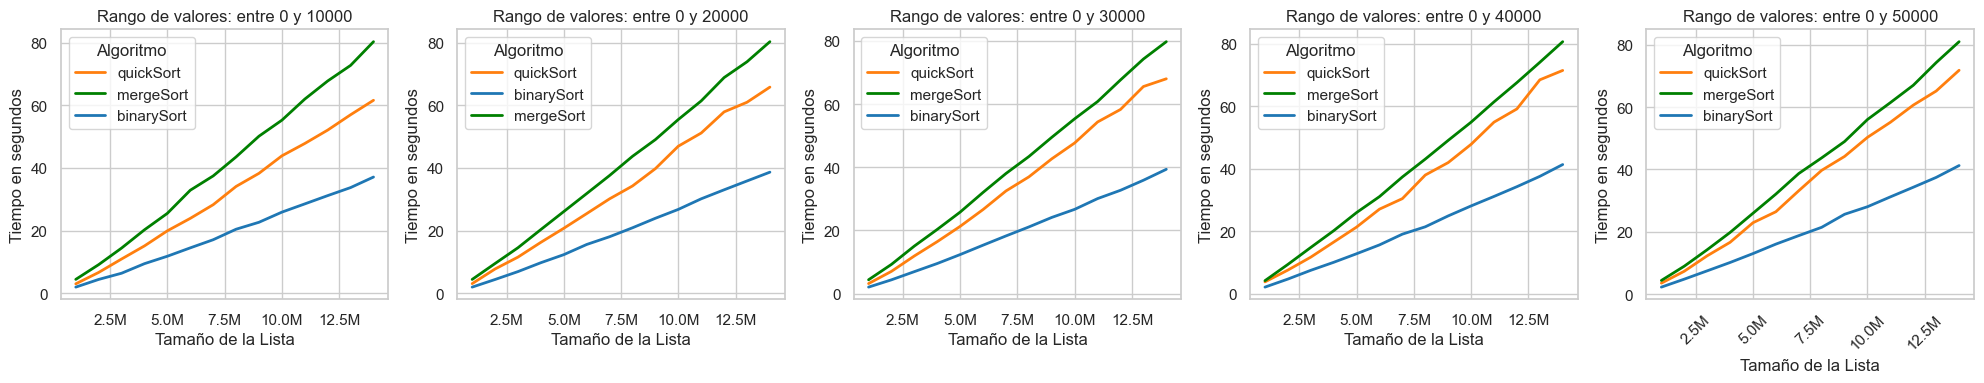

In [249]:
plot_distributions(df, 'normal')

<h3 style="font-size: 1.5em; font-weight: bold;">2. Distribucion Uniforme</h3>
<div style="display: flex; align-items: center;">
    <img src="uniforme.png" alt="Descripción de la imagen" width="200" style="border-radius: 15px; margin-right: 20px;"/>
</div>

<p>
    La <strong>distribución uniforme</strong> es un tipo de distribución de probabilidad en la que todos los resultados posibles tienen la misma probabilidad de ocurrir. En una distribución uniforme, la probabilidad de que una variable aleatoria tome cualquier valor dentro de un rango específico es constante, es decir, no hay un valor que sea más probable que otro dentro de ese rango. La distribución uniforme puede ser de dos tipos: <em>uniforme discreta</em>, donde los valores posibles son finitos y específicos, y <em>uniforme continua</em>, donde los valores posibles pueden tomar cualquier valor dentro de un rango continuo.
</p>

<h3>Ejemplos de Distribución Uniforme</h3>
<ol>
    <li>
        <strong>Lanzamiento de un Dado:</strong><br>
        En el lanzamiento de un dado justo de seis caras, la probabilidad de que salga cualquier número entre 1 y 6 es la misma, es decir, 1/6. Esto es un ejemplo de una distribución uniforme discreta, ya que cada uno de los seis resultados posibles es igualmente probable.
    </li>
    <li>
        <strong>Generación de un Número Aleatorio:</strong><br>
        Si se genera un número aleatorio entre 0 y 1 usando una función de computadora, cada valor dentro del rango de 0 a 1 es igualmente probable. Este es un ejemplo de una distribución uniforme continua, ya que cualquier número real entre 0 y 1 puede ser generado con igual probabilidad.
    </li>
</ol>


#### Análisis del Tiempo de Ejecución de Algoritmos de Ordenamiento Según el Tamaño de la Lista

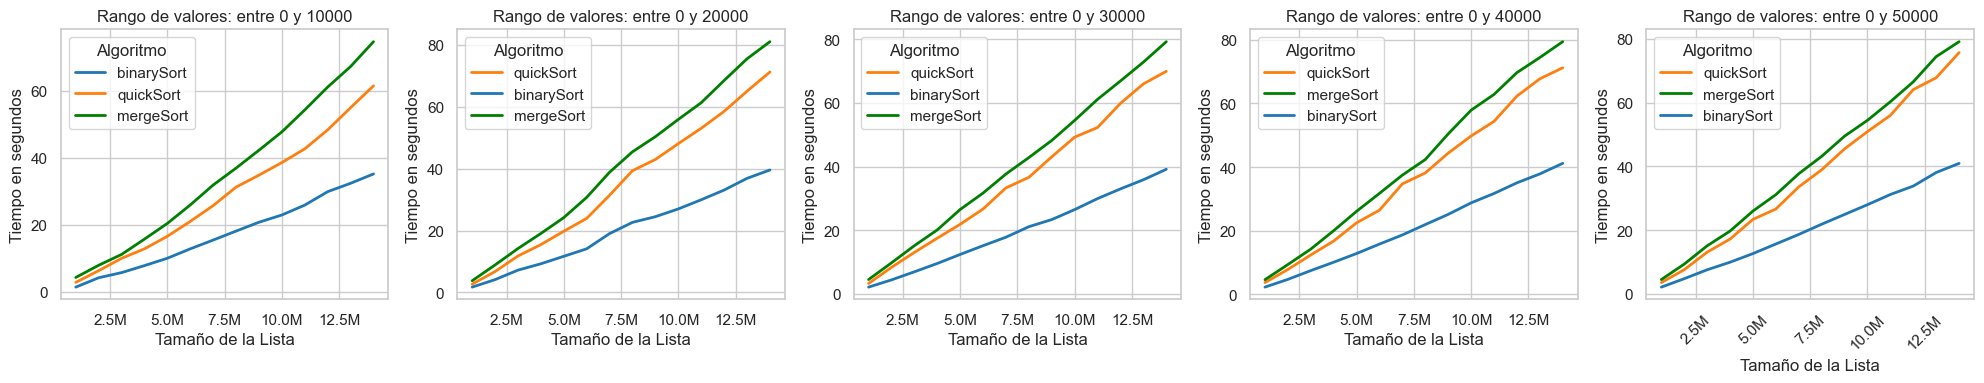

In [250]:
plot_distributions(df, 'uniform')

<h3 style="font-size: 1.5em; font-weight: bold;">3. Distribucion Bimodal</h3>
<div style="display: flex; align-items: center;">
    <img src="bimodal.PNG" alt="Descripción de la imagen" width="200" style="border-radius: 15px; margin-right: 20px;"/>
    
</div>

<p>
    La <strong>distribución bimodal</strong> es un tipo de distribución de probabilidad que tiene dos picos, o "modas". A diferencia de una distribución unimodal, que tiene un solo pico, una distribución bimodal sugiere que los datos se agrupan alrededor de dos valores distintos, lo que indica la presencia de dos subgrupos diferentes dentro del conjunto de datos. Estos picos pueden ser igualmente altos, o uno puede ser más pronunciado que el otro, dependiendo de cómo se distribuyen los datos.
</p>

<h3>Ejemplos de Distribución Bimodal</h3>
<ol>
    <li>
        <strong>Altura en una Población Mixta:</strong><br>
        Si se mide la altura en una población que incluye tanto hombres como mujeres, se puede observar una distribución bimodal. Un pico puede representar la altura promedio de los hombres y el otro la altura promedio de las mujeres, con menos personas teniendo alturas intermedias entre los dos grupos.
    </li>
    <li>
        <strong>Resultados de Exámenes en un Curso con Dos Grupos de Estudiantes:</strong><br>
        Supongamos que en un curso hay dos grupos de estudiantes: uno que estudia regularmente y otro que no lo hace. Los resultados del examen final pueden mostrar una distribución bimodal, donde un pico representa a los estudiantes que estudiaron y obtuvieron calificaciones altas, y el otro pico representa a los estudiantes que no estudiaron y obtuvieron calificaciones bajas.
    </li>
</ol>


#### Análisis del Tiempo de Ejecución de Algoritmos de Ordenamiento Según el Tamaño de la Lista

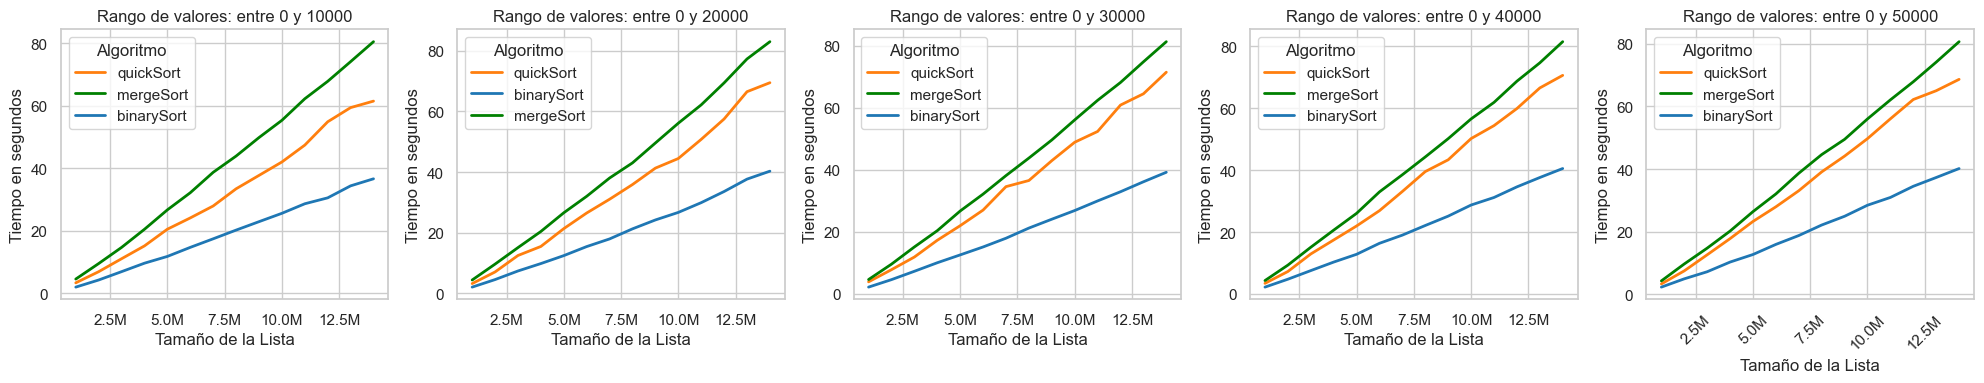

In [251]:
plot_distributions(df, 'bimodal')

<h3 style="font-size: 1.5em; font-weight: bold;">4. Distribucion Sesgada a la derecha</h3>
<div style="display: flex; align-items: center;">
    <img src="right.png"  alt="Descripción de la imagen" width="200" style="border-radius: 15px; margin-right: 20px;"/>
</div>

<p>
    La <strong>distribución sesgada a la derecha</strong>, también conocida como distribución con sesgo positivo, es un tipo de distribución de probabilidad donde la cola derecha es más larga que la cola izquierda. Esto significa que los valores atípicos más grandes son más comunes en el extremo derecho de la distribución. En una distribución sesgada a la derecha, la mayoría de los datos se agrupan hacia el lado izquierdo (valores más bajos), mientras que los valores más altos son menos frecuentes y se extienden hacia la derecha. Como resultado, la media de la distribución suele ser mayor que la mediana.
</p>

<h3>Ejemplos de Distribución Sesgada a la Derecha</h3>
<ol>
    <li>
        <strong>Ingresos Anuales de una Población:</strong><br>
        En la mayoría de las poblaciones, los ingresos anuales de las personas tienden a seguir una distribución sesgada a la derecha. La mayoría de las personas ganan salarios en el rango bajo a medio, mientras que un pequeño número de personas gana salarios muy altos, lo que alarga la cola de la distribución hacia la derecha.
    </li>
    <li>
        <strong>Precios de Viviendas:</strong><br>
        Los precios de las viviendas en una ciudad suelen mostrar una distribución sesgada a la derecha. La mayoría de las viviendas tienen precios moderados, pero algunas propiedades de lujo extremadamente caras estiran la distribución hacia la derecha, creando una cola larga en ese extremo.
    </li>
</ol>


#### Análisis del Tiempo de Ejecución de Algoritmos de Ordenamiento Según el Tamaño de la Lista

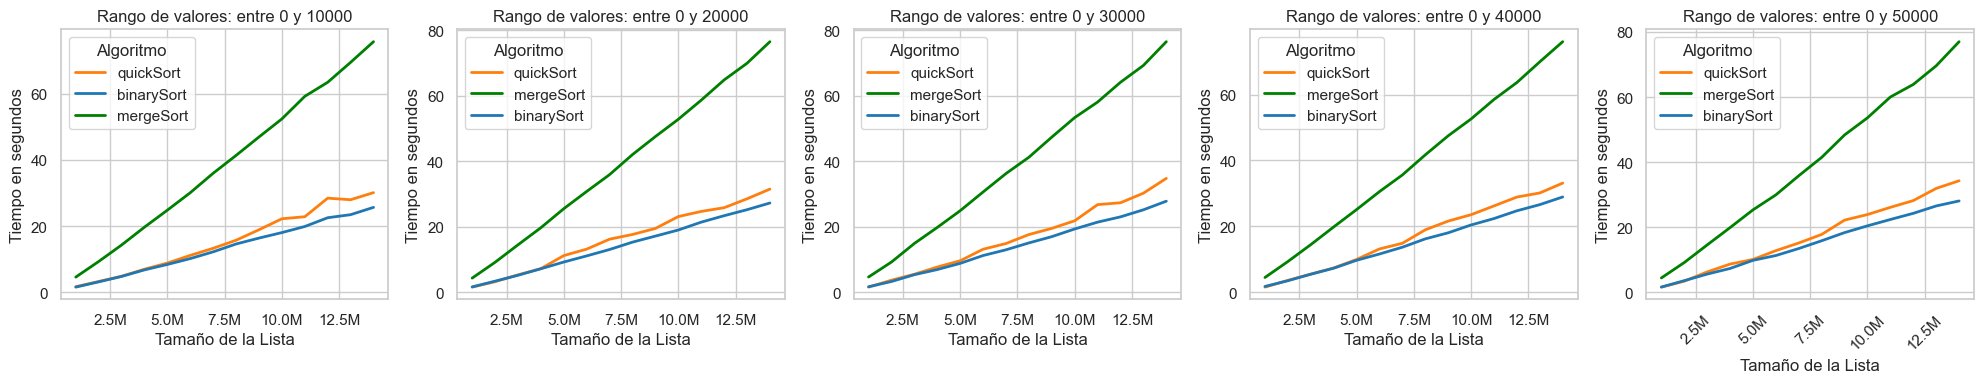

In [252]:
plot_distributions(df, 'right_skewed')

<h3 style="font-size: 1.5em; font-weight: bold;">5. Distribucion Sesgada a la izquierda</h3>
<div style="display: flex; align-items: center;">
    <img src="left.png"  alt="Descripción de la imagen" width="200" style="border-radius: 15px; margin-right: 20px;"/>
    
</div>

<p>
    La <strong>distribución sesgada a la izquierda</strong>, también conocida como distribución con sesgo negativo, es un tipo de distribución de probabilidad donde la cola izquierda es más larga que la cola derecha. Esto significa que los valores atípicos más pequeños son más comunes en el extremo izquierdo de la distribución. En una distribución sesgada a la izquierda, la mayoría de los datos se agrupan hacia el lado derecho (valores más altos), mientras que los valores más bajos son menos frecuentes y se extienden hacia la izquierda. Como resultado, la media de la distribución suele ser menor que la mediana.
</p>

<h3>Ejemplos de Distribución Sesgada a la Izquierda</h3>
<ol>
    <li>
        <strong>Edad de Jubilación:</strong><br>
        En una población de trabajadores, la edad de jubilación puede seguir una distribución sesgada a la izquierda. La mayoría de las personas se jubilan a una edad similar (por ejemplo, entre 60 y 65 años), pero un pequeño número de personas se jubilan mucho más temprano, lo que extiende la cola de la distribución hacia la izquierda.
    </li>
    <li>
        <strong>Notas de Exámenes Fáciles:</strong><br>
        Si un examen es particularmente fácil, la mayoría de los estudiantes obtendrán calificaciones altas, agrupándose cerca del máximo posible. Sin embargo, un pequeño número de estudiantes puede obtener calificaciones mucho más bajas debido a errores o falta de estudio, lo que crea una distribución sesgada a la izquierda.
    </li>
</ol>


#### Análisis del Tiempo de Ejecución de Algoritmos de Ordenamiento Según el Tamaño de la Lista

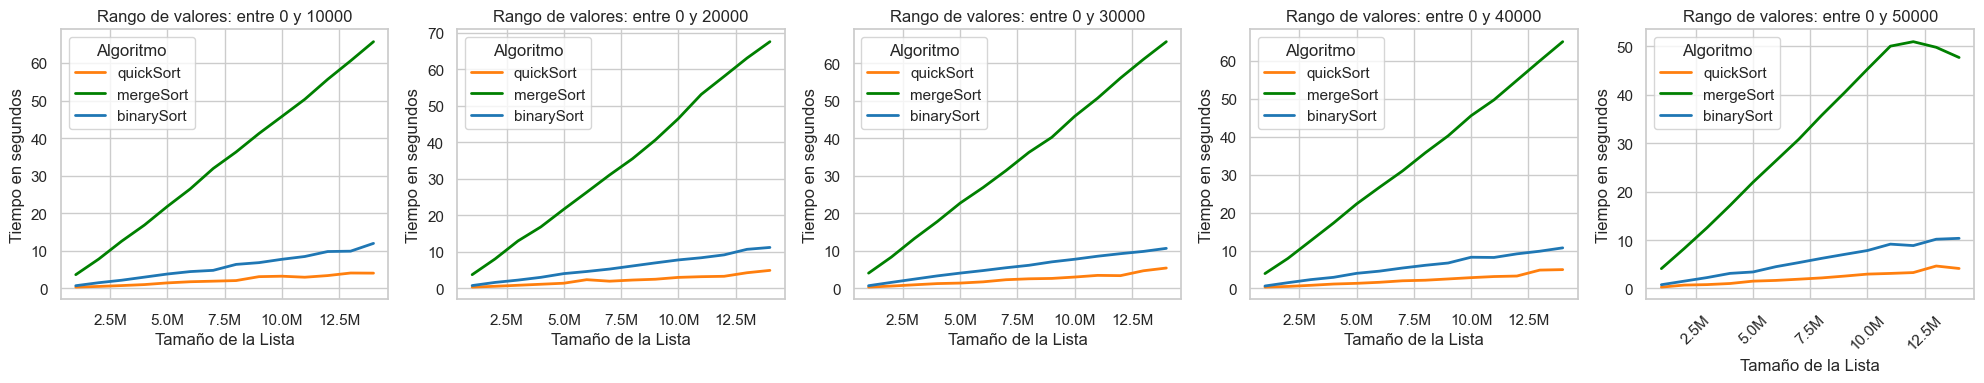

In [253]:
plot_distributions(df, 'left_skewed')

<h3 style="font-size: 1.5em; font-weight: bold;">6. Lista de numeros con el 70% de sus valores en 0</h3>
<div style="display: flex; align-items: center;">
    <img src="zeros.jpg"  alt="Descripción de la imagen" width="200" style="border-radius: 15px; margin-right: 20px;"/>
</div>

### Análisis del Tiempo de Ejecución de Algoritmos de Ordenamiento Según el Tamaño de la Lista

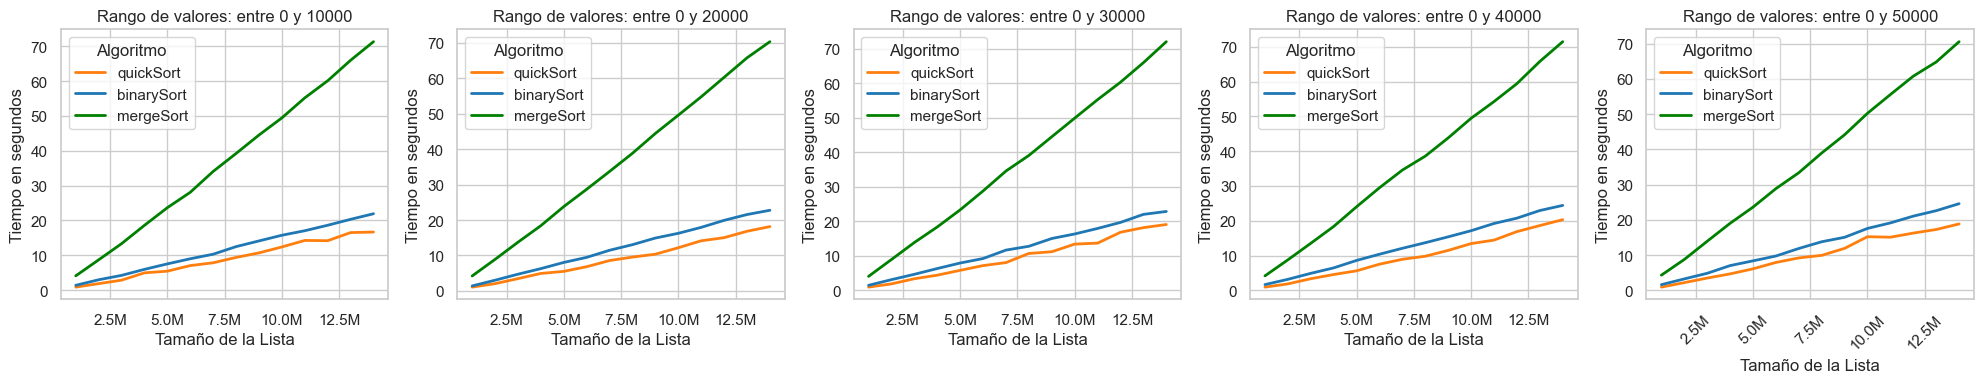

In [254]:
plot_distributions(df, 'zeros')

### BinarySort y QuickSort parecen ser los mas estables y eficientes mientras MergeSort es mas susceptible a las distribuciones con sesgos. 

# Mapa de calor

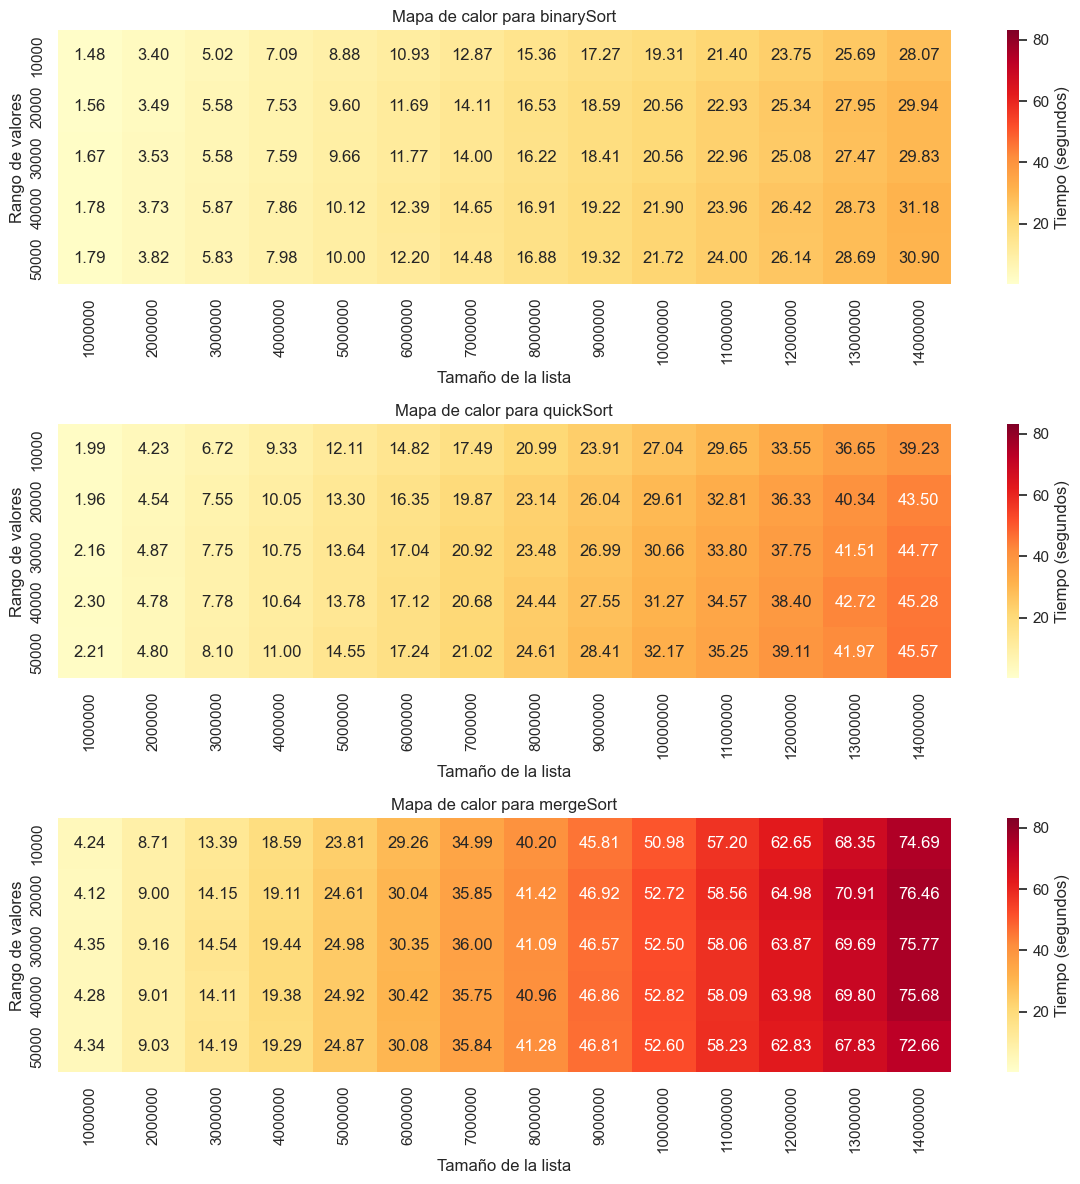

In [255]:

sns.set(style="whitegrid")


vmin = df['time'].min()
vmax = df['time'].max()

fig, axes = plt.subplots(3, 1, figsize=(12, 12))


methods = df['method'].unique()

axes = axes.flatten()

for i, method in enumerate(methods):
    df_method = df[df['method'] == method]
    
    pivot_table = df_method.pivot_table(index="range", columns="size", values="time")
    #YlOrRd  bwr  
    sns.heatmap(pivot_table, ax=axes[i], annot=True, fmt=".2f", cmap="YlOrRd", vmin=vmin, vmax=vmax,  cbar_kws={'label': 'Tiempo (segundos)'} )
    axes[i].set_title(f"Mapa de calor para {method}")
    axes[i].set_xlabel("Tamaño de la lista")
    axes[i].set_ylabel("Rango de valores")

plt.tight_layout()
plt.show()


<h3>Mapa de Calor para quickSort</h3>
<p>El mapa de calor para quickSort muestra un incremento gradual en el tiempo de ejecución a medida que crece el tamaño de la lista. El aumento es particularmente notable cuando el tamaño de la lista supera los 6 millones de elementos. Esto sugiere que quickSort tiene una complejidad de tiempo que se ve más afectada a medida que la lista crece, lo que lo hace menos eficiente para listas muy grandes.</p>

<h3>Mapa de Calor para mergeSort</h3>
<p>El mapa de calor para mergeSort indica un incremento en el tiempo de ejecución, similar a quickSort, pero con un patrón más constante y estable. El tiempo de ejecución es significativamente mayor en comparación con quickSort, especialmente para listas de tamaño superior a 8 millones de elementos. Esto refuerza la idea de que mergeSort, aunque estable, no es tan eficiente en términos de tiempo como quickSort o binarySort cuando se trabaja con listas muy grandes.</p>

<h3>Mapa de Calor para binarySort</h3>
<p>El mapa de calor para binarySort muestra que este algoritmo es consistentemente más rápido que tanto quickSort como mergeSort, especialmente cuando el tamaño de la lista aumenta. Los tiempos de ejecución se incrementan de manera más suave y con valores significativamente menores que en los otros dos algoritmos. Esto indica que binarySort es mucho más eficiente en términos de tiempo de ejecución y maneja mejor el crecimiento del tamaño de la lista, lo que lo hace el algoritmo más adecuado para grandes volúmenes de datos.</p>

<h3>Conclusión General</h3>
<p>El análisis de los tres mapas de calor sugiere que, de los algoritmos comparados, <strong>binarySort</strong> es el más eficiente y escalable, presentando tiempos de ejecución menores incluso a medida que el tamaño de la lista se incrementa considerablemente. <strong>quickSort</strong> también muestra un buen rendimiento, pero empieza a ser menos eficiente que binarySort en listas más grandes. <strong>mergeSort</strong> es el algoritmo menos eficiente en esta comparación, mostrando tiempos de ejecución consistentemente más altos, especialmente en listas de mayor tamaño.<p>


# Grafico de barras

### Cargamos la data

In [256]:
ranges = df["range"].unique()
distributions = df["distribution"].unique()
sizes = df["size"].unique()
quickSort = 0
mergeSort = 0
binarySort = 0
for ran in ranges:
    for dist in distributions:
        for si in sizes:
            temp = df[(df["range"] == ran) & (df["distribution"] == dist) & (df["size"] == si )]
            method_with_min_time = temp.loc[temp['time'].idxmin(), 'method']
            #method_second_min_time = temp.loc[temp['time'].nsmallest(2).idxmax(), 'method']
            #method_max_time = temp.loc[temp['time'].idxmax(), 'method']
            if method_with_min_time == 'quickSort':
                quickSort += 1
            if method_with_min_time == 'mergeSort':
                mergeSort += 1
            if method_with_min_time == 'binarySort':
                binarySort += 1

methods = [ 'binarySort', 'mergeSort', 'quickSort']
times = [binarySort, mergeSort, quickSort, ] 


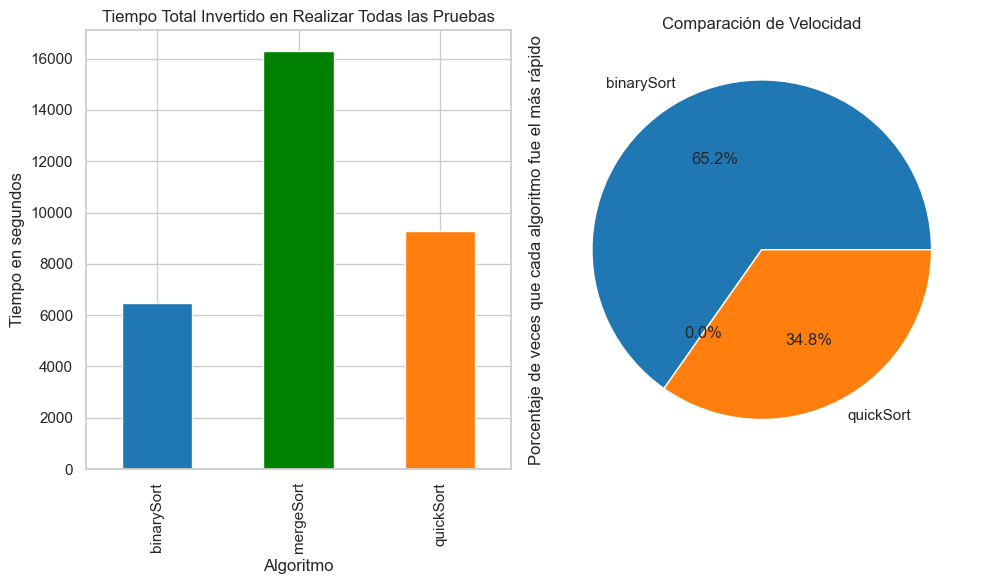

In [257]:

fastest_method_counts = pd.Series(times, index=methods)
total_time_per_method = df.groupby('method')['time'].sum()
colors = ['#1f77b4', 'green', '#ff7f0e']


fig, axes = plt.subplots(1, 2, figsize=(10, 6))  


total_time_per_method.plot(kind='bar', color=colors, ax=axes[0], title='Tiempo Total Invertido en Realizar Todas las Pruebas')
axes[0].set_xlabel('Algoritmo')
axes[0].set_ylabel('Tiempo en segundos')


fastest_method_counts.plot.pie( ax=axes[1],autopct='%1.1f%%', colors=colors,  title='Comparación de Velocidad')
axes[1].set_ylabel('Porcentaje de veces que cada algoritmo fue el más rápido')

plt.tight_layout()

plt.show()

In [258]:
total_time_per_method

method
binarySort     6472.383123
mergeSort     16284.123173
quickSort      9279.025927
Name: time, dtype: float64

In [264]:
fastest_method_counts

binarySort    274
mergeSort       0
quickSort     146
dtype: int64

<h3>Gráfico de Barras: Tiempo Total Invertido en Realizar Todas las Pruebas</h3>
<p>Este gráfico muestra el tiempo total que cada algoritmo de ordenamiento tomó para realizar todas las pruebas. Podemos observar lo siguiente:</p>
<ul>
    <li><strong>binarySort</strong> es el algoritmo que menos tiempo total invirtió, con aproximadamente 6400 segundos. Esto refuerza la conclusión previa de que es el algoritmo más eficiente en términos de tiempo de ejecución.</li>
    <li><strong>mergeSort</strong> es el algoritmo más lento, con un tiempo total cercano a los 16,000 segundos, lo que lo coloca como el menos eficiente entre los tres.</li>
    <li><strong>quickSort</strong> está en una posición intermedia, con un tiempo total de aproximadamente 9200 segundos, lo que sugiere que es más rápido que mergeSort pero significativamente más lento que binarySort.</li>
</ul>

<h3>Gráfico Circular: Comparación de Velocidad</h3>
<p>Este gráfico de pastel muestra el porcentaje de veces que cada algoritmo fue el más rápido durante las pruebas:</p>
<ul>
    <li><strong>binarySort</strong> fue el más rápido en el 65.2% de las pruebas, lo que confirma su superioridad en términos de velocidad y eficiencia general.</li>
    <li><strong>quickSort</strong> fue el más rápido en el 34.8% de las pruebas. Aunque no es tan eficiente como binarySort, quickSort aún tiene un desempeño competitivo en ciertas condiciones.</li>
    <li><strong>mergeSort</strong> no aparece como el más rápido en ninguna de las pruebas (0%), lo que indica que siempre fue superado por los otros dos algoritmos en términos de velocidad.</li>
</ul>


# ScatterPLot

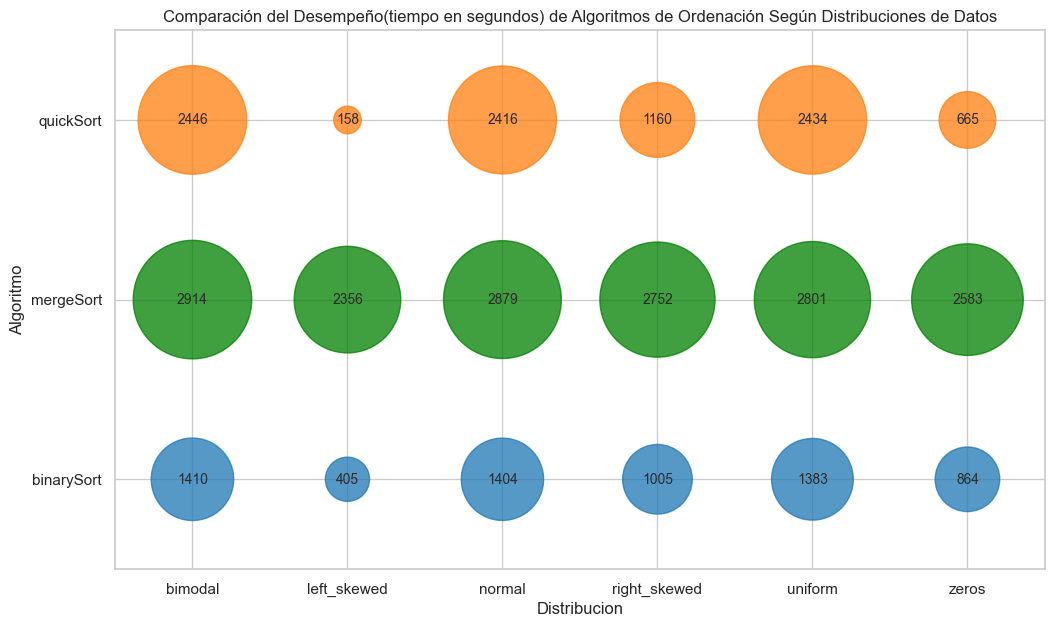

In [260]:

grouped_df = df.groupby(['distribution', 'method'])['time'].sum().reset_index()

unique_methods = grouped_df['method'].unique()
color_map = {
    'binarySort': '#1f77b4',
    'mergeSort': 'green',
    'quickSort': '#ff7f0e',
}


plt.figure(figsize=(12, 7))
for method in unique_methods:
    subset = grouped_df[grouped_df['method'] == method]
    plt.scatter(
        x=subset['distribution'],
        y=subset['method'],
        s=subset['time'] * 2.5, 
        alpha=0.75,
        color=color_map[method],
        label=method
    )
    for i in range(len(subset)):
        plt.text(
            subset['distribution'].iloc[i],  
            subset['method'].iloc[i],        
            f"{subset['time'].iloc[i]:.0f}", 
            ha='center', va='center',       
            fontsize=10,                      
            color='#2B2B2B'  
        )

plt.xlim(-0.5, len(grouped_df['distribution'].unique()) - 0.5)
plt.ylim(-0.5, len(grouped_df['method'].unique()) - 0.5)

plt.xlabel('Distribucion')
plt.ylabel('Algoritmo')
plt.title('Comparación del Desempeño(tiempo en segundos) de Algoritmos de Ordenación Según Distribuciones de Datos')

plt.show()

<p>
    El gráfico presentado es un diagrama de dispersión (scatter plot) que compara el desempeño de tres algoritmos de ordenación: <strong>binarySort</strong>, <strong>quickSort</strong>, y <strong>mergeSort</strong>, a través de diferentes distribuciones de datos. Cada burbuja en el gráfico representa un caso particular donde se ha aplicado uno de los algoritmos a una distribución específica de datos.
</p>
<p>
    El eje horizontal (X) representa las diferentes <strong>distribuciones</strong> de datos utilizadas: <em>bimodal, left_skewed, normal, right_skewed, uniform</em>, y <em>zeros</em>. El eje vertical (Y) indica el <strong>algoritmo de ordenación</strong> utilizado.
</p>
<p>
    El tamaño de cada burbuja está determinado por el <strong>tiempo total</strong> que tomó el algoritmo para ordenar la distribución de datos correspondiente. El valor exacto de este tiempo se muestra dentro de cada burbuja.
</p>
<p>
    <strong>Observaciones:</strong>
    <ul>
        <li>El algoritmo <strong>mergeSort</strong> (representado en verde) generalmente muestra los tiempos más altos en la mayoría de las distribuciones, lo que sugiere que es el más lento en comparación con los otros algoritmos en este contexto específico.</li>
        <li>El algoritmo <strong>quickSort</strong> (representado en naranja) tiene un rendimiento variable. En algunas distribuciones como <em>left_skewed</em> y <em>zeros</em>, tiene tiempos significativamente más bajos, lo que indica un mejor rendimiento. Sin embargo, en otras distribuciones, su tiempo de ejecución es más alto, lo que indica una mayor variabilidad en su rendimiento.</li>
        <li>El algoritmo <strong>binarySort</strong> (representado en azul) generalmente tiene burbujas más pequeñas, lo que sugiere que, en promedio, tiene un mejor rendimiento en términos de tiempo en comparación con los otros algoritmos.</li>
    </ul>
</p>



## Boxplot

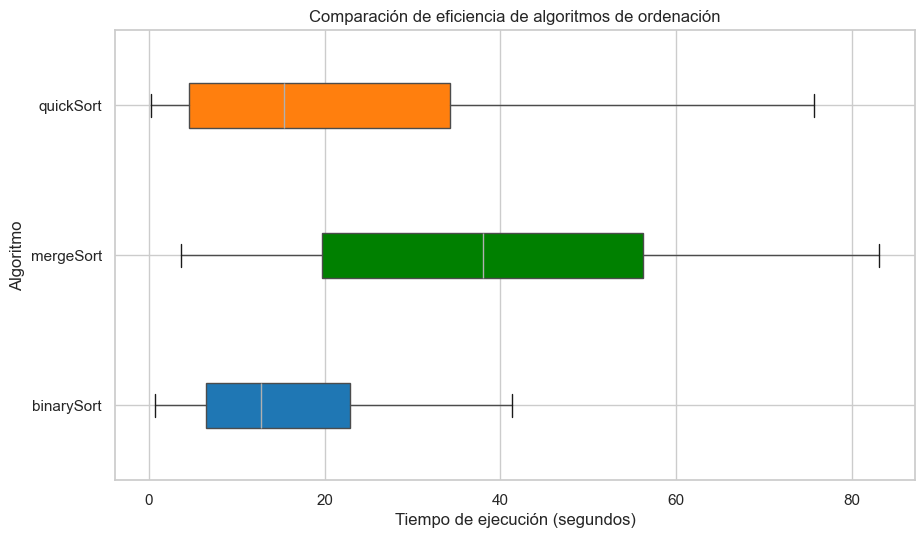

In [261]:

colors = ['#1f77b4', 'green', '#ff7f0e']

fig, ax = plt.subplots(figsize=(10, 6))

boxes = df.boxplot(column='time', by='method', ax=ax, vert=False, patch_artist=True)

for patch, color in zip(ax.patches, colors):
    patch.set_facecolor(color)

for flier in ax.findobj(plt.Line2D):
    flier.set_markerfacecolor('red')
    flier.set_markeredgecolor('black')

ax.set_xlabel('Tiempo de ejecución (segundos)')
ax.set_ylabel('Algoritmo')
ax.set_title('Comparación de eficiencia de algoritmos de ordenación')

plt.suptitle("")

plt.show()



<p>El gráfico de boxplot compara la eficiencia de tres algoritmos de ordenación: <strong>quickSort</strong>, <strong>mergeSort</strong> y <strong>binarySort</strong>. En este gráfico, se representa la distribución de los tiempos de ejecución (en segundos) de cada algoritmo. A continuación se detalla la interpretación de cada uno:</p>

<h3>quickSort</h3>
<ul>
    <li>El rango intercuartílico (IQR), representado por la caja de color naranja, muestra la dispersión de los tiempos de ejecución. El IQR de quickSort es relativamente amplio, indicando una variabilidad significativa en su rendimiento.</li>
    <li>El valor medio (la línea dentro de la caja) está cercano a los 18 segundos, lo que indica que quickSort tiende a ser más rápido que mergeSort pero no tan eficiente como binarySort.</li>
</ul>

<h3>mergeSort</h3>
<ul>
    <li>El IQR para mergeSort (caja verde) es el más grande de los tres algoritmos, lo que sugiere una alta variabilidad en los tiempos de ejecución. Esto significa que mergeSort puede ser inconsistente en su rendimiento.</li>
    <li>La mediana del tiempo de ejecución está alrededor de los 40 segundos, lo que lo hace el más lento en comparación con los otros dos algoritmos.</li>
</ul>

<h3>binarySort</h3>
<ul>
    <li>El IQR de binarySort (caja azul) es el más pequeño de los tres, lo que indica una menor variabilidad en los tiempos de ejecución. Esto sugiere que binarySort es el algoritmo más consistente y confiable en términos de rendimiento.</li>
    <li>La mediana del tiempo de ejecución está por los 16 segundos, lo que lo posiciona como el algoritmo más rápido y eficiente entre los tres.</li>
    <li>binarySort también tiene un rango total pequeño, lo que indica que incluso en los peores casos, binarySort sigue siendo más rápido que los otros dos algoritmos en sus mejores casos.</li>
</ul>



## Grafico de densidad

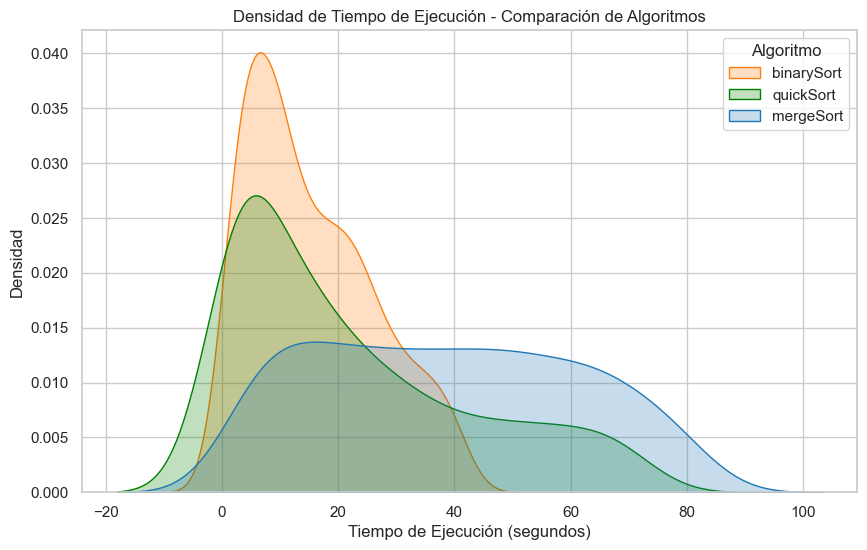

In [262]:

colors = ['#ff7f0e', 'green', '#1f77b4']
df_cleaned = df[['method', 'time']].dropna()
df_cleaned['time'] = pd.to_numeric(df_cleaned['time'], errors='coerce')
df_cleaned = df_cleaned.dropna()


methods = df_cleaned['method'].unique()


plt.figure(figsize=(10, 6))

for method, color in zip(methods, colors):
    method_data = df_cleaned[df_cleaned['method'] == method]['time']
    sns.kdeplot(method_data, color=color, fill=True, label=method)

# Ajustes de la gráfica
plt.title('Densidad de Tiempo de Ejecución - Comparación de Algoritmos')
plt.xlabel('Tiempo de Ejecución (segundos)')
plt.ylabel('Densidad')
plt.legend(title='Algoritmo')

# Mostrar la gráfica
plt.show()


<p>El gráfico de densidad refuerza la nocion de binarySort como el algoritmo más eficiente y consistente, con la mayoría de sus tiempos de ejecución concentrados en torno a un valor bajo (~10 segundos). quickSort, aunque rápido en muchos casos, muestra una mayor variabilidad y una distribución más extendida, lo que sugiere que su rendimiento es menos predecible. mergeSort es claramente el menos eficiente, con una distribución que se desplaza hacia tiempos de ejecución más largos, reflejando su menor rendimiento en comparación con los otros dos algoritmos. Estos resultados destacan a binarySort como la mejor opción en términos de velocidad y confiabilidad, especialmente en escenarios donde la eficiencia es crítica.</p>







